# Stochastic Network Model 

#### This is not the exact same simulation I have included in the poster. It's the same code ran again, to illustrate how simulations can differ

 ## 1. Packages, Imports 

In [1]:
import networkx as nx
import EoN
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np

## 2. The model for day 0 to day 76

### 2.1. Model

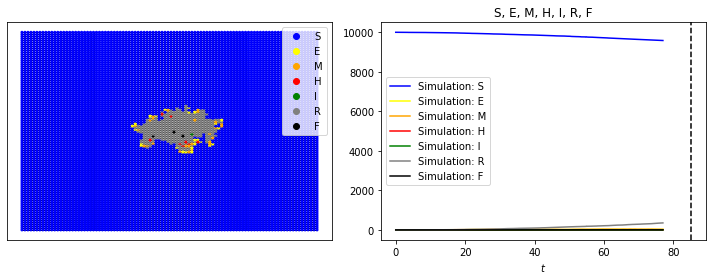

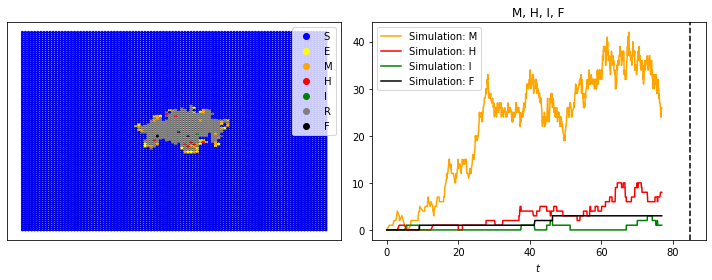

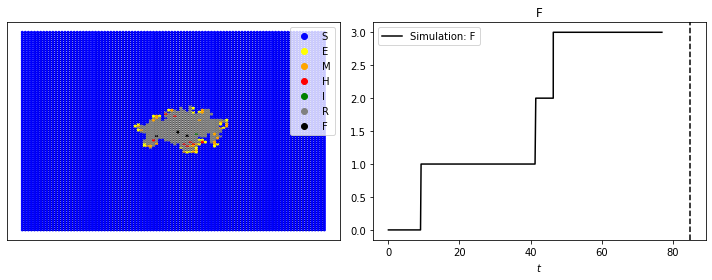

In [4]:
#parameters, initial assumptions
r_M=0.3
r_H=0.02
r_I=0.02
r_EM=0.19
r_MH=0.1
r_HI=0.1
r_MR=0.14
r_HR=0.154
r_IR=0.14
r_IF=0.3

#network graph
G = nx.grid_2d_graph(100,100)


#function for simulation
def simulator(IC,   r_EM, r_MH, r_HI, r_MR, r_HR, r_IR, r_IF,r_H, r_I, r_M, tmin, tmax):
    
    #the spontaneous transitions
    
    H = nx.DiGraph()
    H.add_edge('E', 'M', rate = r_EM)
    H.add_edge('M', 'H', rate = r_MH)
    H.add_edge('H', 'I', rate = r_HI)
    H.add_edge('M', 'R', rate = r_MR)
    H.add_edge('H', 'R', rate = r_HR)
    H.add_edge('I', 'R', rate = r_IR)
    H.add_edge('I', 'F', rate = r_IF)

    #the induced transitions
    
    J = nx.DiGraph()
    J.add_edge(('M', 'S'), ('M', 'E'), rate =r_M)
    J.add_edge(('H', 'S'), ('H', 'E'), rate = r_H)
    J.add_edge(('I', 'S'), ('I', 'E'), rate = r_I)

    
    
    return_statuses = ['S', 'E', 'M', 'H', 'I', 'R', 'F' ]
    color_dict = {'S': 'blue', 'E': 'yellow', 'M':'orange', 'H':'red', 'I':'green', 'R':'gray', 'F':'black'}
    pos = {node:node for node in G}

    sim_kwargs = {'color_dict':color_dict, 'pos':pos, 'tex':False}
    return  EoN.Gillespie_simple_contagion(G, H, J, IC, return_statuses, tmin= tmin, tmax=tmax,return_full_data=True, sim_kwargs=sim_kwargs)


#initial conditions

initial_infections = [(u,v) for (u,v) in G if 49<u<51 and 49<v<51]
IC = defaultdict(lambda:'S')
for node in initial_infections:
        IC[node] = 'E'


#creating the timeseries & simulation

#all compartments
sim1=simulator(IC, r_M, r_H, r_I, r_EM, r_MH, r_HI, r_MR, r_HR, r_IR, r_IF, tmin=0, tmax=77)
times1, D1 = sim1.summary()
newD1 = {'S':D1['S'], 'E': D1['E'], 'M': D1['M'], 'H':D1['H'], 'I' : D1['I'], 'R': D1['R'], 'F':D1['F']}##newD is a new dict giving number not yet infected or the number ever infected#Let’s add this timeseries to the simulation.#
sim1.display(time=85, node_size = 4, ts_plots=[['S', 'E', 'M', 'H', 'I', 'R', 'F']])
plt.savefig('NSEMHIRF1.png')
plt.show()

#M, H, I, F compartments
sim1.display(time=85, node_size = 4, ts_plots=[['M', 'H',  'I', 'F']])
plt.savefig('NMHIF1.png')
plt.show()
 
#F compartment
sim1.display(time=85, node_size = 4, ts_plots=[['F']])
plt.savefig('NF1.png')
plt.show()

### 2.2 Animation

In [3]:
anim=sim1.animate(ts_plots=[ ['S', 'E', 'M', 'H', 'I', 'R', 'F']], node_size = 4)
anim.save('SEMHIRF_animate.gif', fps=5, extra_args=['-vcodec', 'libx264'], writer='ffmpeg')

NameError: name 'sim' is not defined

In [ ]:
from IPython.display import Image
with open('SEMHIRF_animate.gif','rb') as file:
    display(Image(file.read())) 

## 3. The Model from day 88 to day 160

In [5]:
#getting last statuses
nodelist =  [(u,v) for (u,v) in G]
statuses = sim1.get_statuses(nodelist, 76)


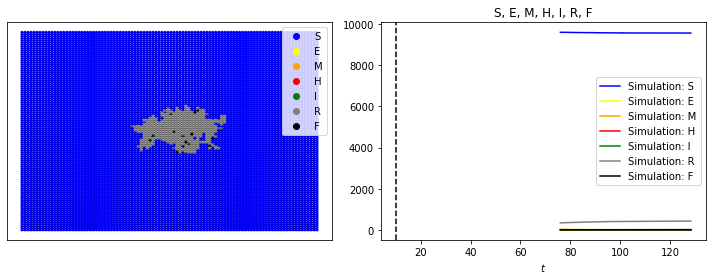

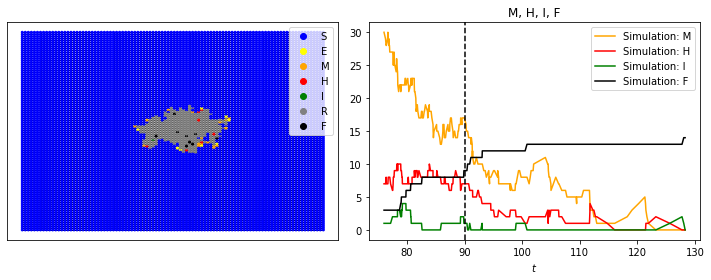

In [6]:
G = nx.grid_2d_graph(100,100)

#new 'initial conditions'
IC2 = defaultdict(lambda:'S')
for node in nodelist:
    IC2[node]=statuses[node]
    
#next bit of simulation
sim2=simulator(IC2,  r_EM, r_MH, r_HI, r_MR, r_HR, r_IR, r_IF,r_H, r_I,r_M=0.05,  tmin=76, tmax=165)

times2, D2 = sim2.summary()

newD2 = {'S':D2['S'], 'E': D2['E'], 'M': D2['M'], 'H':D2['H'], 'I' : D2['I'], 'R': D2['R'], 'F':D2['F']}##newD is a new dict giving number not yet infected or the number ever infected#Let’s add this timeseries to the simulation.#
sim2.display(time=10, node_size = 4, ts_plots=[['S', 'E', 'M', 'H', 'I', 'R', 'F']])
#plt.savefig('NSEMHIRF2.png')
plt.show()

sim2.display(time=90, node_size = 4, ts_plots=[['M', 'H',  'I', 'F']])
plt.savefig('NMHIF2')
plt.show()

In [7]:
#putting it together
times = np.concatenate((times1, times2))
D = {}
for key in D1:
    D[key] = np.concatenate((D1[key], D2[key]))
newD = {'S':D['S'], 'E': D['E'], 'M': D['M'], 'H':D['H'], 'I' : D['I'], 'R': D['R'], 'F':D['F']}


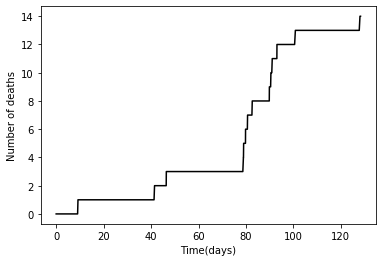

In [8]:
#cumulative deaths
plt.plot(times, newD['F'], label='Fatalities', color= 'black')
plt.xlabel('Time(days)')
plt.ylabel('Number of deaths')

plt.savefig('N31.png')

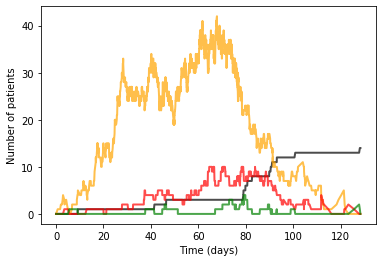

In [9]:
#plotting the first 160 days
f, ax = plt.subplots(1,1,figsize=(6, 4))
   
ax.plot(times, D['F'], 'k', alpha=0.7, linewidth=2, label='Deaths')
ax.plot(times, D['M'], 'orange', alpha=0.7, linewidth=2, label='Mild')
ax.plot(times, D['H'], 'r', alpha=0.7, linewidth=2,label='Hospitalised' )
ax.plot(times, D['I'], 'g', alpha=0.7, linewidth=2, label='Intensive Care')
        
ax.set_xlabel('Time (days)')
ax.set_ylabel('Number of patients')
plt.savefig('2N32.png')
plt.show();